# Introduction to TensorFlow 

TensorFlow is a deep learning framework that allows you to build neural networks more easily than by hand, and thus can speed up your deep learning development significantly. However, TensorFlow is not just a deep learning library, but really a library for deep learning. It's really just a number-crunching library, similar to Numpy, but the difference is that TensorFlow allows us to perform machine-learning specific number-crunching operations (e.g. derivatives on huge matrices). Using TensorFlow, We can also easily distribute these processes across our CPU cores, GPU cores, but also across a distributed network of computers. 

We will be demonstrating TensorFlow in Python (obviously), but for those who are interested, they have APIs in the following languages: C++, Haskell, Java, Go, and Rust. TensorFlow is avaliable as third party packages in C#, Julia, R, and Scala.

**Important Note**: A lot of this coding tutorial comes from Andrew Ng's Deep Learning course on Coursera

Alright, let's get started! First, let's import a couple of libraries we will be using. 

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize your Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations you'd written above. 

Now let us look at an easy example:

In [2]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c) #Question: What should the output be?

Tensor("Mul:0", shape=(), dtype=int32)


As expected, you will not see 20! You got a tensor saying that the result is a tensor that does not have the shape attribute, and is of type "int32". All you did was put in the 'computation graph', but you have not run this computation yet. In order to actually multiply the two numbers, you will have to create a session and run it.

In [3]:
sess = tf.Session()
print(sess.run(c))

20


To summarize, **remember to initialize your variables, create a session and run the operations inside the session**. 

Quick aside: Note that there are two typical ways to create and use sessions in tensorflow: 

**Method 1:**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session
```
**Method 2:**
```python
with tf.Session() as sess: 
    # run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session for you :)
```

Next, you'll also have to know about **placeholders**. A placeholder is an object whose value you can specify only later. 
To specify values for a placeholder, you can pass in values by using a "feed dictionary" (`feed_dict` variable). Let's see what that looks like.

In [4]:
x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


When we first defined `x` we did not have to specify a value for it. A placeholder is simply a variable that you will assign data to later when running the session. We say that you **feed data** to these placeholders when running the session. 

Here's what's happening: When you specify the operations needed for a computation, you are telling TensorFlow how to construct a computation graph. The computation graph can have some placeholders whose values you will specify only later. Finally, when you run the session, you are telling TensorFlow to execute the computation graph.

### Linear Function in TensorFlow

Let's start with a very simple exercise, by computing the following equation: $Y = WX + b$, where $W$ and $X$ are random matrices and $b$ is a random vector.

Compute $WX + b$ where $W, X$, and $b$ are drawn from a random normal distribution. W is of shape (4, 3), X is (3,1) and b is (4,1).

In [5]:
X = tf.constant(np.random.randn(3,1), name="X")
W = tf.constant(np.random.randn(4,3), name="W")
b = tf.constant(np.random.randn(4,1), name="b")
Y = tf.add(tf.matmul(W, X), b)

sess = tf.Session()
result = sess.run(Y)
sess.close()
print("Result = " + str(result))

Result = [[ 0.53380064]
 [-2.63905905]
 [-2.47518684]
 [ 1.99205077]]


### Sigmoid in TensorFlow

So while we just saw that you can compute user defined functions, Tensorflow offers a variety of commonly used neural network functions like `tf.sigmoid` and `tf.softmax`. Let's compute the sigmoid function of an input. 

In [6]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    x = tf.placeholder(tf.float32, name="x")
    sigmoid = tf.sigmoid(x)

    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict={x: z})
    
    return result

In [7]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.999994


### Computing the Cost

You can also use a built-in function to compute the cost of your neural network. 

Let's implement the cross entropy loss. The function we will use is: 

- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

We will input `z`, compute the sigmoid (to get `a`) and then compute the cross entropy cost $J$. All this can be done using one call to `tf.nn.sigmoid_cross_entropy_with_logits`, which computes

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{i}) + (1-y^{(i)})\log (1-\sigma(z^{i})\large )\small\tag{2}$$

In [8]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    z = tf.placeholder(tf.float32, name="z")
    y = tf.placeholder(tf.float32, name="y")
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z, labels = y)
    
    sess = tf.Session()
    cost = sess.run(cost, feed_dict={z: logits, y: labels})
    sess.close()
    
    return cost

In [9]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [ 1.00538719  1.03664076  0.41385433  0.39956617]


### One Hot Encodings

Many times in deep learning you will have a y vector with numbers ranging from 0 to C-1, where C is the number of classes. If C is for example 4, then you might have to convert as follows:

<img src="images/one_hot.png">

This is called a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1). To do this conversion in numpy, you might have to write a few lines of code. In tensorflow, you can use one line of code: 

- tf.one_hot(labels, depth, axis) 

In [10]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    C = tf.constant(C, name="C")
    one_hot_matrix = tf.one_hot(labels, C, 1)
    
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
        
    return one_hot

In [11]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]]


## Building a Neural Network with TensorFlow

Now that we have seen a little bit about how TensorFlow works, let's build our first neural network. To begin, we will import the MNIST data set:

In [12]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [13]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

print ("Number of training examples = " + str(X_train.shape[0]))
print ("Number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

Number of training examples = 55000
Number of test examples = 10000
X_train shape: (55000, 784)
Y_train shape: (55000, 10)
X_test shape: (10000, 784)
Y_test shape: (10000, 10)


So, what does this mean? In our data set, there are 55,000 examples of handwritten digits from zero to nine. Each example is a 28x28 pixel image flattened in an array with 784 values representing each pixel’s intensity. 

**Our goal** is to build an algorithm capable of recognizing a digit with high accuracy. To do so, we are going to build a tensorflow neural network model. 

**The model** is *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*.  

### Create Placeholders

Our first task is to create placeholders for `X` and `Y`. This will allow you to later pass your training data in when you run your session. 

In [14]:
def create_placeholders(num_features, num_classes):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    num_features -- scalar, size of an image vector (num_px * num_px = 28 * 28 = 748)
    num_classes -- scalar, number of classes (from 0 to 9, so -> 10)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    """

    X = tf.placeholder(tf.float32, shape=[None, num_features])
    Y = tf.placeholder(tf.float32, shape=[None, num_classes])
    
    return X, Y

**Note: ** When we assign None to our placeholder, it means the placeholder can be fed as many examples as you want to give it. In this case, our placeholder can be fed any multitude of 784-sized values.

In [15]:
X, Y = create_placeholders(X_train.shape[1], Y_train.shape[1])
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


### Initialize Parameters 

In [16]:
def initialize_parameters(num_features, num_classes):
    """
    Initializes parameters to build a neural network with tensorflow. 
    
    Arguments:
    num_features -- scalar, size of an image vector (num_px * num_px = 28 * 28 = 748)
    num_classes -- scalar, number of classes (from 0 to 9, so -> 10)
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
        
    W1 = tf.get_variable("W1", [num_features, 25], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [1,25], initializer = tf.zeros_initializer())
    W2 =  tf.get_variable("W2", [25, 12], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [1,12], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [12, num_classes], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [1, num_classes], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [17]:
with tf.Session() as sess:
    parameters = initialize_parameters(X_train.shape[1], Y_train.shape[1])
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(784, 25) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(1, 25) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(25, 12) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(1, 12) dtype=float32_ref>


As expected, the parameters haven't been evaluated yet.

### Forward Propogation in TensorFlow

In [18]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (Number of examples, number of features)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(X, W1), b1)                      # Z1 = np.dot(X, W1) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(A1, W2), b2)                     # Z2 = np.dot(A1, W2) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(A2, W3), b3)                     # Z3 = np.dot(A2, W3) + b3
    
    return Z3

### Compute Cost

In [19]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y))
    
    return cost

### Backward propagation & parameter updates

This is where you become grateful to programming frameworks. All the backpropagation and the parameters update is taken care of in 1 line of code. It is very easy to incorporate this line in the model.

After you compute the cost function. You will create an "`optimizer`" object. You have to call this object along with the cost when running the tf.session. When called, it will perform an optimization on the given cost with the chosen method and learning rate.

For instance, for gradient descent the optimizer would be:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

To make the optimization you would do:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to inputs.

### Building the model

Now, you will bring it all together! 

In [20]:
def random_mini_batches(X, Y, mini_batch_size):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data
    Y -- true "label" vector
    mini_batch_size - size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation, :]
    shuffled_Y = Y[permutation, :]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 200, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set features
    Y_train -- training set class values
    X_test -- test set features
    Y_test -- test set class values
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    (m, num_features) = X_train.shape                 # (m : number of examples in the train set, n_features: input size)
    num_classes = Y_train.shape[1]                      # n_classes : output size
    costs = []                                        # To keep track of the cost
    
    # Create placeholders
    X, Y = create_placeholders(num_features, num_classes)

    # Initialize parameters
    parameters = initialize_parameters(num_features, num_classes)
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                           # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 10 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3,1), tf.argmax(Y,1))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 1.307985
Cost after epoch 10: 0.238964
Cost after epoch 20: 0.174543
Cost after epoch 30: 0.138436
Cost after epoch 40: 0.115311
Cost after epoch 50: 0.099348
Cost after epoch 60: 0.087089
Cost after epoch 70: 0.077886
Cost after epoch 80: 0.070402
Cost after epoch 90: 0.063858
Cost after epoch 100: 0.057954
Cost after epoch 110: 0.053059
Cost after epoch 120: 0.048777
Cost after epoch 130: 0.044882
Cost after epoch 140: 0.041180
Cost after epoch 150: 0.037872
Cost after epoch 160: 0.034899
Cost after epoch 170: 0.031970
Cost after epoch 180: 0.029517
Cost after epoch 190: 0.027057


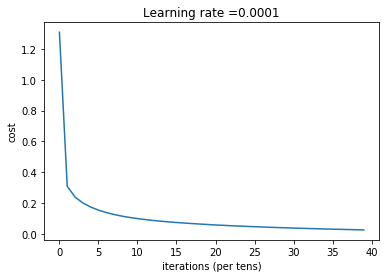

Parameters have been trained!
Train Accuracy: 0.994909
Test Accuracy: 0.9632


In [21]:
parameters = model(X_train, Y_train, X_test, Y_test)

<font color='blue'>
**Major Takeaways**:
- Tensorflow is a programming framework used in deep learning
- The two main object classes in tensorflow are Tensors and Operators. 
- When you code in tensorflow you have to take the following steps:
    - Create a graph containing Tensors (Variables, Placeholders ...) and Operations (tf.matmul, tf.add, ...)
    - Create a session
    - Initialize the session
    - Run the session to execute the graph
- You can execute the graph multiple times as you've seen in model()
- The backpropagation and optimization is automatically done when running the session on the "optimizer" object.